In [29]:
# import libraries
import pandas as pd
import numpy as np
import os

from helper import *

In [10]:
pd.options.display.max_columns = 100

In [67]:
def getcolnum(data, col_of_int=['tvdss','GR','RESS','RESM','RESD','NEUT','DENS','DTC']):
    return [data.columns.tolist().index(col) for col in col_of_int]

def shalecutoff(data, grcol, shale_cutoff=120):
    return data.iloc[:, grcol].map(lambda x: np.nan if np.isnan(x) else 'SD' if x<=shale_cutoff else 'SH')

def get_litho(data, dencol, dctcol, pecol, litho1col, normalized=True):
    litho = []
    for i in range(len(data)):
        density = data.iat[i, dencol]
        dct = data.iat[i, dctcol]
        pe = data.iat[i, pecol]
        args = [density, dct, pe]
        if np.isnan(args).all():
            litho.append(np.nan)
        elif data.iat[i, litho1col]=='SH':
            litho.append('SH')
        else:
            litho.append(auto_detect_facies_2(*args, normalized))
    return litho

def nanremover(data, subsetname):
    return data.copy().dropna(axis=0, how='any', subset=[subsetname])

def class_encoder(data, litho1col, litho2col):
    data.iloc[:, litho1col] = data.iloc[:, litho1col].map(lambda x: '0' if 'SH' else '1')
    data.iloc[:, litho2col] = data.iloc[:, litho2col].map(lambda x: '0' if x=='SH' else '1' if x=='SS' else '2' if x=='LS' else '3')
    return data

In [6]:
# all well data files
data_list = os.listdir('../data/synth_inputs/')

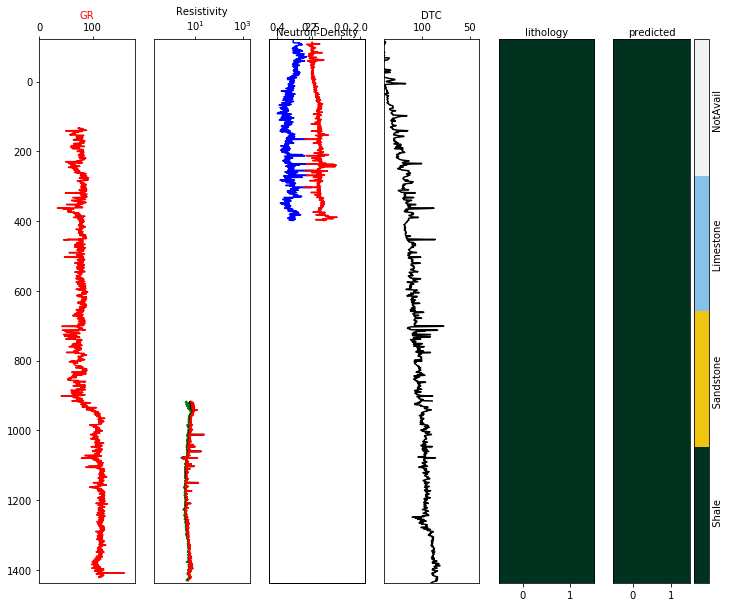

In [74]:
# read which data
data = pd.read_csv('../data/synth_inputs/'+data_list[1])
#data = pd.read_csv('data_to_plot.csv')

# sand/shale
data['litho1'] = shalecutoff(data, *getcolnum(data, ['GR']), shale_cutoff=20)

# sand --> SS, LS
data['litho2'] = get_litho(data, *getcolnum(data, ['DENS','DTC','PEF','litho1']))

# remove nan
data.dropna(axis=0, how='any', subset=['litho2'], inplace=True)

# encode litho1 and litho2 into ordinal
data = class_encoder(data, -2, -1)

# plot
plotter2(data, *getcolnum(data, ['tvdss','GR','RESS','RESM','RESD','NEUT','DENS','DTC','litho1','litho2']))

## Test

In [75]:
data = pd.read_csv('../data/synth_inputs/cheal-a10.csv')

In [76]:
data

,tvdss,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESM,RESS,SP,fm,well,DTS,GR_CORR,NEUT_CORR,RESD_CORR,RESS_CORR,TEMP,TENS,lat,lon
0,-186.439881,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239
1,-186.287886,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239
2,-186.134892,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239
3,-185.982897,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239
4,-185.830902,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239
5,-185.677907,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239
6,-185.525913,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239
7,-185.372918,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239
8,-185.220923,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239
9,-185.068929,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239


In [89]:
data['litho1'] = data.GR.map(lambda x: np.nan if np.isnan(x) else '1' if x<=170 else '0')

In [90]:
litho2 = []
for i,row in enumerate(data.index):
    checkdata = data.at[row, 'litho1']
    if checkdata==np.nan:
        litho2.append(np.nan)
    elif checkdata == '0':
        litho2.append(0)
    else:
        litho2.append(auto_detect_facies_2(data.at[row, 'DENS'], data.at[row, 'DTC'], data.at[row, 'PEF']))
        
data['litho2'] = litho2

In [91]:
data.dropna(subset=['litho1'], inplace=True)

In [92]:
getcolnum(data, ['tvdss','GR','RESS','RESM','RESD','NEUT','DENS','DTC','litho1','litho2'])

[0, 6, 11, 10, 9, 7, 3, 5, 24, 25]

In [93]:
data.head()

,tvdss,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESM,RESS,SP,fm,well,DTS,GR_CORR,NEUT_CORR,RESD_CORR,RESS_CORR,TEMP,TENS,lat,lon,litho1,litho2
1277,8.168393,12.25,10.906,2.299,NaN,169.423,104.777,0.448,NaN,NaN,NaN,NaN,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239,1,SS
1278,8.320387,12.25,11.469,2.264,NaN,194.679,108.908,0.374,2.430,NaN,NaN,NaN,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239,1,SS
1279,8.472382,12.25,11.607,2.245,NaN,182.024,107.032,0.380,2.667,NaN,NaN,11.921,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239,1,SS
1280,8.625377,12.25,11.653,2.226,NaN,141.384,108.087,0.413,2.685,NaN,NaN,12.428,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239,1,SS
1281,8.777372,12.25,11.891,2.218,0.001,138.035,100.763,0.423,2.707,NaN,NaN,12.156,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239,1,SS


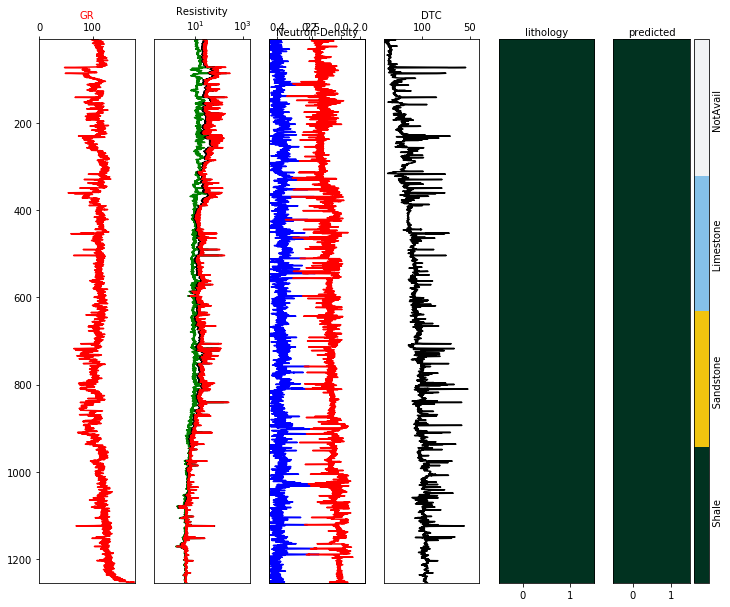

In [94]:
plotter2(data, *[0, 6, 11, 10, 9, 7, 3, 5, 24, 25])